<a href="https://colab.research.google.com/github/Gilles2711/programing/blob/main/Enron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enron Email Analysis**

# Introduction

Enrom was among of the biggest and best influential firm in the US state. It's an American energy firm that went broke in 2001, laying off hundreds of people suddenly without a job(reference). Due to increased rivalry, firm profitability began to plummet, enticing the corporation to engage in suspect accounting procedures in order to keep the difficulties hidden. Enron had to hide so information off the books because it used particular learning groups to shield its investors from learning about its demise (reference). The company's executive were arrested in connection with enormous scam (reference). As a result an inquiry was conduct across email sent by the organization in order to determine the source and wrongdoing of workers, as well as who the primary perpetrators were. The purpose of this research is to analyse data and disclose enron email activity with its clients history.

# Coding

In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import Enron.db
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2rBi5wtHbswBH2kd2uTnz6r1ka7GI36GUQ?download=1

--2022-05-29 08:07:56--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2rBi5wtHbswBH2kd2uTnz6r1ka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106346 (104K) [text/html]
Saving to: ‘enron.db’

enron.db            100%[===================>] 103.85K   247KB/s    in 0.4s    

2022-05-29 08:07:57 (247 KB/s) - ‘enron.db’ saved [106346/106346]



In [ ]:
# Import sqlite3 & Pandas
import sqlite3
import pandas

In [ ]:
#create & connection & cursor object
conn = sqlite3.connect('/content/extract (2)')
cur = conn.cursor()

In [ ]:
#Create Message table
sql = """
create table if not exists Message(
  mid INT PRIMARY KEY,
  Sender TEXT,
  Date REAL,
  Subject TEXT,
  Message_ID REAL,
  Body TEXT,
  Folder TEXT
);
"""
# Execute query & commit transaction
cur.execute(sql)
conn.commit()

In [ ]:
#create Recipient info table
sql = """
CREATE TABLE IF NOT EXISTS RecipientInfo(
  rid TEXT PRIMARY KEY,
  mid TEXT,
  Rtype REAL,
  Rvalue TEXT
);
"""
#Execute query & commit transaction
cur.execute(sql)
conn.commit()

In [ ]:
# create Reference info table
sql = """
CREATE TABLE IF NOT EXISTS ReferenceInfo(
  Rfid TEXT PRIMARY KEY,
  mid TEXT,
  Reference REAL
);
"""
#Execute query & commit transaction
cur.execute(sql)
conn.commit()

## Emails sent by senders

In [22]:
 sql = """
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count
 DESC
 LIMIT 10
 ;
"""
#Execute sql query
rows = cur.execute(sql)
for row in rows:
  print(row)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Message send per day

In [ ]:
sql = """
SELECT date(Date) AS date_emailsent, count(mid) AS message_count
     FROM message
     GROUP BY date_emailsent
     ORDER BY date_emailsent;
"""
#Execute SQL query
rows = cur.execute(sql)
for row in rows:
  print(row)

In [ ]:
import pandas as pd
sql = """
SELECT date(date) AS date_emailsent,count(mid) AS MESSAGE_COUNT
     FROM message
     GROUP BY date_emailsent
     ORDER BY date_emailsent;
"""
#Dataframe
note_df = pd.read_sql_query(sql,conn)
note_df

,date_emailsent,MESSAGE_COUNT


# Graph plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

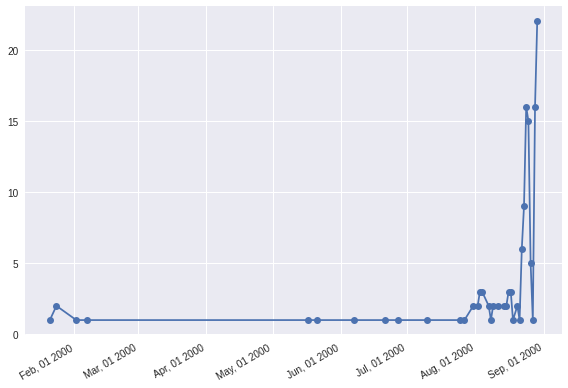

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
dates = [
         datetime(2000, 1, 21),
         datetime(2000, 1, 24),
         datetime(2000, 2, 2),
         datetime(2000, 2, 7),
         datetime(2000,5 ,17),
         datetime(2000, 5, 21),
         datetime(2000, 6, 7),
         datetime(2000, 6, 21),
         datetime(2000, 6, 27),
         datetime(2000, 7, 10),
         datetime(2000, 7, 25),
         datetime(2000, 7, 27),
         datetime(2000, 7, 31),
         datetime(2000, 8, 2),
         datetime(2000, 8, 3),
         datetime(2000, 8, 4),
         datetime(2000, 8, 7),
         datetime(2000, 8, 8),
         datetime(2000, 8, 9),
         datetime(2000, 8, 11),
         datetime(2000, 8, 14),
         datetime(2000, 8, 15),
         datetime(2000, 8, 16),
         datetime(2000, 8, 17),
         datetime(2000, 8, 18),
         datetime(2000, 8, 20),
         datetime(2000, 8, 21),
         datetime(2000, 8, 22),
         datetime(2000, 8, 23),
         datetime(2000, 8, 24),
         datetime(2000, 8, 25),
         datetime(2000, 8, 26),
         datetime(2000, 8, 27),
         datetime(2000, 8, 28),
         datetime(2000, 8, 29),
        
]
y = [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 1, 2, 1, 6, 9, 16, 15, 5, 1, 16, 22]


plt.plot_date(dates, Y, linestyle='solid')
plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.show()


# Analysis

In this investigation, I attempted to examine the number of emails exchange within the company.
We may try to examine when every of these mail were sent when we identify the number of email sent. Examine the top ten emails with which Enron employee corresponded the most.



# Discussion

# Conclusion

# Reference